In [1]:
# default_exp model

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# export
import torch
import torch.nn as nn

from functools import partial
from fastai import *
from fastai.basic_train import Learner

from keraTorch.data import create_db
from keraTorch.layers import *
from keraTorch.losses import *

In [4]:
# export
class Sequential:
    def __init__(self):
        self.layers = []
        self.last_dim = None
        
    def add(self, layer):
        layer = layer.get_layer(self.last_dim)
        self.last_dim = layer['output_dim']
        self.layers.extend(layer['layers'])
        
    def compile(self, loss, optimizer=None):
        self.model = nn.Sequential(*self.layers)
        self.loss = loss
        
    def fit(self, x, y, bs, epochs, lr=1e-3, one_cycle=True, get_lr=True):
        db = create_db(x, y, bs)
        self.learn = Learner(db, self.model, loss_func=self.loss)
        if one_cycle:
            self.learn.fit_one_cycle(epochs, lr)
        else:
            self.learn.fit(epochs, lr)
               
    def lr_find(self, x, y, bs):
        db = create_db(x, y, bs)
        learn = Learner(db, self.model, loss_func=self.loss)
        learn.lr_find()
        learn.recorder.plot(suggestion=True)
        
    def predict(self, x):
        self.learn.model.eval()
        with torch.no_grad():
            y_preds = self.learn.model(torch.Tensor(x))
        return y_preds.cpu().numpy()

In [5]:
from sklearn.datasets import load_iris
import numpy as np

data = load_iris()
x, y = data['data'], data['target']
x.shape, y.shape, x.dtype, y.dtype

((150, 4), (150,), dtype('float64'), dtype('int64'))

In [6]:
model = Sequential()
model.add(Dense(2, x.shape[1], activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(len(data['target_names'])))
model.add(Activation('softmax'))

In [7]:
model.compile(ce4softmax)

epoch,train_loss,valid_loss,time
0,1.111903,#na#,00:00
1,1.111903,#na#,00:00
2,1.111903,#na#,00:00
3,1.111903,#na#,00:00
4,1.111903,#na#,00:00
5,1.111903,#na#,00:00
6,1.111903,#na#,00:00
7,1.111903,#na#,00:00
8,1.111903,#na#,00:00
9,1.111903,#na#,00:00


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.98E-02
Min loss divided by 10: 1.10E-01


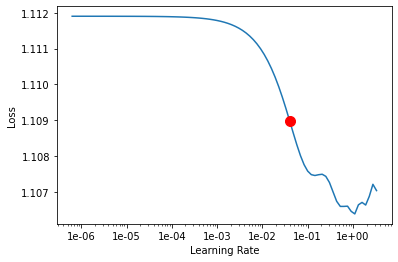

In [8]:
bs = 50
model.lr_find(x, y, bs=bs)

In [9]:
model.fit(x, y, bs, epochs=3, lr=1e-1)

epoch,train_loss,valid_loss,time
0,1.115773,1.138416,00:00
1,1.115403,1.124795,00:00
2,1.111594,1.115480,00:00


In [10]:
preds = model.predict(x[:2])
preds

array([[0.320896, 0.279767, 0.399338],
       [0.320896, 0.279767, 0.399338]], dtype=float32)

In [12]:
preds.sum(axis=-1, keepdims=True)

array([[1.],
       [1.]], dtype=float32)

In [13]:
# hide
from nbdev.export import *
notebook2script()

Converted Activations.ipynb.
Converted Layers.ipynb.
Converted Model.ipynb.
Converted data.ipynb.
Converted index.ipynb.
Converted losses.ipynb.
